In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import TimeSeriesSplit
from sklearn.utils import resample
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from joblib import dump, load
from pathlib import Path

# Data processing

In [4]:
current_dir = Path.cwd()

In [5]:
data_path = current_dir.parent.parent / 'Data_Processing' / 'merge' / 'df+dist+hol.csv'

In [6]:
df = pd.read_csv(data_path)

In [3]:
df['datetime'] = pd.to_datetime(df['datetime'])

In [4]:
df

,city_address,day_precip,day_precipcover,day_snow,day_windspeed,day_winddir,day_uvindex,hour_temp,hour_humidity,hour_precip,...,tg_vector,sun,Engels2,Baltimore,Saki,Belbek,Olenya,Mozdok,Savasleyka,hol_risk
0,Lutsk,0.118,4.17,0.1,15.5,252.7,1.0,2.4,89.18,0.0,...,0.000000,0,1455.26,4146.69,879.66,913.50,1985.20,1640.87,1244.19,0
1,Lutsk,0.118,4.17,0.1,15.5,252.7,1.0,2.4,87.90,0.0,...,0.001509,0,1455.26,4146.69,879.66,913.50,1985.20,1640.87,1244.19,0
2,Lutsk,0.118,4.17,0.1,15.5,252.7,1.0,2.9,88.58,0.0,...,0.001647,0,1455.26,4146.69,879.66,913.50,1985.20,1640.87,1244.19,0
3,Lutsk,0.118,4.17,0.1,15.5,252.7,1.0,2.3,86.63,0.0,...,0.001527,0,1455.26,4146.69,879.66,913.50,1985.20,1640.87,1244.19,0
4,Lutsk,0.118,4.17,0.1,15.5,252.7,1.0,1.9,87.85,0.0,...,0.001569,0,1455.26,4146.69,879.66,913.50,1985.20,1640.87,1244.19,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
608230,Poltava,0.000,0.00,0.0,12.2,164.8,4.0,-1.3,73.09,0.0,...,0.004000,0,849.44,3488.99,506.42,550.41,2064.88,1000.54,834.96,0
608231,Poltava,0.000,0.00,0.0,12.2,164.8,4.0,-1.8,81.17,0.0,...,0.004180,0,849.44,3488.99,506.42,550.41,2064.88,1000.54,834.96,0
608232,Poltava,0.000,0.00,0.0,12.2,164.8,4.0,-1.0,68.31,0.0,...,0.004348,0,849.44,3488.99,506.42,550.41,2064.88,1000.54,834.96,0
608233,Poltava,0.000,0.00,0.0,12.2,164.8,4.0,-1.7,71.36,0.0,...,0.004455,0,849.44,3488.99,506.42,550.41,2064.88,1000.54,834.96,0


In [5]:
df.isna().sum()

city_address                          0
day_precip                            0
day_precipcover                       0
day_snow                              0
day_windspeed                         0
day_winddir                           0
day_uvindex                           0
hour_temp                             0
hour_humidity                         0
hour_precip                           0
hour_precipprob                       0
hour_snow                             0
hour_windspeed                        0
hour_winddir                          0
hour_pressure                         0
hour_visibility                       0
hour_cloudcover                       0
hour_uvindex                          0
datetime                              0
Clear                                 0
Ice                                   0
Snow                                  0
Overcast                              0
Rain                                  0
Fog                                   0


In [6]:
df['text_vector'] = df['text_vector'].fillna(0)

In [7]:
df.isna().sum()

city_address                      0
day_precip                        0
day_precipcover                   0
day_snow                          0
day_windspeed                     0
day_winddir                       0
day_uvindex                       0
hour_temp                         0
hour_humidity                     0
hour_precip                       0
hour_precipprob                   0
hour_snow                         0
hour_windspeed                    0
hour_winddir                      0
hour_pressure                     0
hour_visibility                   0
hour_cloudcover                   0
hour_uvindex                      0
datetime                          0
Clear                             0
Ice                               0
Snow                              0
Overcast                          0
Rain                              0
Fog                               0
Partially cloudy                  0
Freezing Drizzle/Freezing Rain    0
anomaly                     

In [8]:
df['alarms'].unique()

array([0, 1, 2, 3, 4, 5], dtype=int64)

In [9]:
df['alarms'] = df['alarms'].apply(lambda x: 1 if x > 0 else 0)

In [10]:
df['alarms'].unique()

array([0, 1], dtype=int64)

In [11]:
df.columns

Index(['city_address', 'day_precip', 'day_precipcover', 'day_snow',
       'day_windspeed', 'day_winddir', 'day_uvindex', 'hour_temp',
       'hour_humidity', 'hour_precip', 'hour_precipprob', 'hour_snow',
       'hour_windspeed', 'hour_winddir', 'hour_pressure', 'hour_visibility',
       'hour_cloudcover', 'hour_uvindex', 'datetime', 'Clear', 'Ice', 'Snow',
       'Overcast', 'Rain', 'Fog', 'Partially cloudy',
       'Freezing Drizzle/Freezing Rain', 'anomaly', 'alarms', 'date',
       'text_vector', 'tg_vector', 'sun', 'Engels2', 'Baltimore', 'Saki',
       'Belbek', 'Olenya', 'Mozdok', 'Savasleyka', 'hol_risk'],
      dtype='object')

In [12]:
df = df.drop(columns=['anomaly', 'date'])

In [13]:
df = df.sort_values(by=['city_address', 'datetime']).reset_index(drop=True)

In [14]:
df

,city_address,day_precip,day_precipcover,day_snow,day_windspeed,day_winddir,day_uvindex,hour_temp,hour_humidity,hour_precip,...,tg_vector,sun,Engels2,Baltimore,Saki,Belbek,Olenya,Mozdok,Savasleyka,hol_risk
0,Cherkasy,0.0,0.00,0.0,8.3,47.6,2.0,0.9,75.73,0.0,...,0.000000,0,1025.18,3668.16,498.42,541.81,2081.6,1143.82,961.08,0
1,Cherkasy,0.0,0.00,0.0,8.3,47.6,2.0,0.6,77.96,0.0,...,0.001509,0,1025.18,3668.16,498.42,541.81,2081.6,1143.82,961.08,0
2,Cherkasy,0.0,0.00,0.0,8.3,47.6,2.0,0.4,82.08,0.0,...,0.001647,0,1025.18,3668.16,498.42,541.81,2081.6,1143.82,961.08,0
3,Cherkasy,0.0,0.00,0.0,8.3,47.6,2.0,0.2,83.28,0.0,...,0.001527,0,1025.18,3668.16,498.42,541.81,2081.6,1143.82,961.08,0
4,Cherkasy,0.0,0.00,0.0,8.3,47.6,2.0,0.0,83.87,0.0,...,0.001569,0,1025.18,3668.16,498.42,541.81,2081.6,1143.82,961.08,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
608230,Zhytomyr,6.3,8.33,2.1,14.8,191.3,2.0,1.3,99.28,0.0,...,0.004000,0,1236.30,3912.38,682.83,721.31,2007.4,1402.20,1080.25,0
608231,Zhytomyr,6.3,8.33,2.1,14.8,191.3,2.0,1.2,100.00,0.3,...,0.004180,0,1236.30,3912.38,682.83,721.31,2007.4,1402.20,1080.25,0
608232,Zhytomyr,6.3,8.33,2.1,14.8,191.3,2.0,1.7,97.17,0.0,...,0.004348,0,1236.30,3912.38,682.83,721.31,2007.4,1402.20,1080.25,0
608233,Zhytomyr,6.3,8.33,2.1,14.8,191.3,2.0,1.0,100.00,0.0,...,0.004455,0,1236.30,3912.38,682.83,721.31,2007.4,1402.20,1080.25,0


In [15]:
df = df.drop(columns=['city_address'])

In [16]:
exclude_cols = ['alarms', 'datetime']
feature_cols = [col for col in df.columns if col not in exclude_cols]

In [17]:
scaler = StandardScaler()
df[feature_cols] = scaler.fit_transform(df[feature_cols])

# Oversampling data

In [18]:
df_majority = df[df['alarms'] == 0]
df_minority = df[df['alarms'] == 1]

In [19]:
df_minority_upsampled = resample(
    df_minority,
    replace=True,
    n_samples=len(df_majority),
    random_state=42
)

In [20]:
df_balanced = pd.concat([df_majority, df_minority_upsampled])

In [21]:
df_balanced = df_balanced.sample(frac=1, random_state=42).reset_index(drop=True)

In [22]:
df_balanced['alarms'].value_counts()

alarms
1    502391
0    502391
Name: count, dtype: int64

In [23]:
df_balanced

,day_precip,day_precipcover,day_snow,day_windspeed,day_winddir,day_uvindex,hour_temp,hour_humidity,hour_precip,hour_precipprob,...,tg_vector,sun,Engels2,Baltimore,Saki,Belbek,Olenya,Mozdok,Savasleyka,hol_risk
0,-0.196124,-0.541428,-0.182755,-1.385921,-1.073902,-0.303290,-1.810338,0.689234,-0.040789,-0.264817,...,-1.942260,-1.109194,0.352180,0.387576,0.038457,0.034519,-0.091686,0.344628,0.257286,-0.634577
1,0.833242,0.146796,-0.182755,1.430678,0.492879,0.827490,0.355580,1.197025,-0.040789,-0.264817,...,0.505902,0.901555,-0.518335,-0.248358,0.647554,0.690317,-1.902220,0.142105,-1.147375,2.371226
2,-0.158692,0.835846,0.118957,0.966084,1.586990,-1.057143,-1.330158,-0.223044,-0.040789,-0.264817,...,-1.103491,0.901555,-0.457596,-0.498846,-0.936397,-0.919148,0.343922,-0.611320,-0.334055,2.371226
3,-0.196124,-0.541428,-0.182755,1.459715,1.325232,-0.680217,-0.614997,-1.132752,-0.040789,-0.264817,...,-1.747513,-1.109194,1.086922,1.003794,0.418405,0.374568,0.774952,0.840190,1.192935,-0.634577
4,1.968164,0.835846,-0.182755,1.488752,0.387423,-1.810996,-0.962361,0.765814,2.688850,3.776197,...,0.514988,-1.109194,-1.336742,-1.046060,0.283388,0.323449,-1.478225,-0.620753,-1.777087,2.371226
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1004777,-0.196124,-0.541428,-0.182755,-0.079252,-0.632303,-0.303290,-1.227992,-0.597207,-0.040789,-0.264817,...,-1.851827,-1.109194,0.965269,1.087729,1.337810,1.345687,-1.021441,1.238692,0.621765,-0.634577
1004778,-0.196124,-0.541428,-0.182755,-1.139106,-0.756591,1.204416,1.693954,-1.799358,-0.040789,-0.264817,...,0.378981,0.901555,0.751563,0.879818,1.071617,1.080962,-0.997807,1.019328,0.407587,-0.634577
1004779,-0.196124,-0.541428,-0.182755,1.488752,0.311155,0.073636,0.549695,-1.275633,-0.040789,-0.264817,...,-1.259093,0.901555,-1.602171,-1.399010,-0.054879,-0.029059,-0.760569,-1.094359,-1.686046,0.367357
1004780,-0.196124,-0.541428,-0.182755,0.966084,1.394908,0.073636,-1.708173,-1.013000,-0.040789,-0.264817,...,-1.963438,-1.109194,-1.602171,-1.399010,-0.054879,-0.029059,-0.760569,-1.094359,-1.686046,-0.634577


In [24]:
X = df_balanced[feature_cols]
y = df_balanced['alarms']

In [25]:
tscv = TimeSeriesSplit(n_splits=5)

for train_index, val_index in tscv.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[val_index]
    y_train, y_test = y.iloc[train_index], y.iloc[val_index]

# Parameters searching

In [37]:
param_dist = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None],
    'bootstrap': [True, False]
}

In [38]:
model = RandomForestClassifier(
    random_state=42,
    n_jobs=-1
)

In [39]:
random_search = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_dist,
    n_iter=10,
    cv=3,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

In [40]:
X_sample, y_sample = resample(X, y, n_samples=100_000, random_state=42)

In [41]:
X_sample.isna().sum()

day_precip                        0
day_precipcover                   0
day_snow                          0
day_windspeed                     0
day_winddir                       0
day_uvindex                       0
hour_temp                         0
hour_humidity                     0
hour_precip                       0
hour_precipprob                   0
hour_snow                         0
hour_windspeed                    0
hour_winddir                      0
hour_pressure                     0
hour_visibility                   0
hour_cloudcover                   0
hour_uvindex                      0
Clear                             0
Ice                               0
Snow                              0
Overcast                          0
Rain                              0
Fog                               0
Partially cloudy                  0
Freezing Drizzle/Freezing Rain    0
text_vector                       0
tg_vector                         0
sun                         

In [42]:
y_sample.isna().sum()

0

In [43]:
random_search.fit(X_sample, y_sample)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3,
                   estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [None, 10, 20, 30],
                                        'max_features': ['sqrt', 'log2', None],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300]},
                   random_state=42, verbose=2)

In [44]:
random_search.best_estimator_

RandomForestClassifier(max_depth=20, max_features=None, min_samples_split=5,
                       n_estimators=200, n_jobs=-1, random_state=42)

In [45]:
random_search.best_estimator_.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 20,
 'max_features': None,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 200,
 'n_jobs': -1,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

# Model training

In [25]:
model = RandomForestClassifier(
    n_estimators=200,
    max_depth=20,
    min_samples_split=5,
    min_samples_leaf=1,
    max_features=None,
    bootstrap=True,
    n_jobs=-1,
    random_state=42,
    class_weight='balanced'
)
model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=20, max_features=None,
                       min_samples_split=5, n_estimators=200, n_jobs=-1,
                       random_state=42)

# Evaluating model

In [26]:
model = load("random_forest_classifier.pkl")

In [40]:
y_pred = model.predict(X_train)
y_proba = model.predict_proba(X_train)[:, 1]

In [41]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.91      0.95    418687
           1       0.92      0.99      0.95    418632

    accuracy                           0.95    837319
   macro avg       0.95      0.95      0.95    837319
weighted avg       0.95      0.95      0.95    837319



In [42]:
train_confusion_matrix = confusion_matrix(y_train, y_pred)

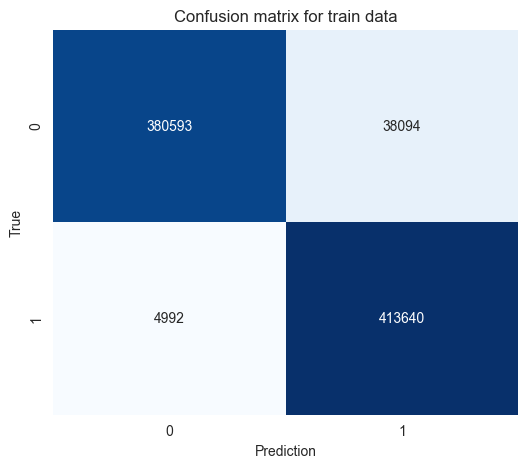

In [43]:
plt.figure(figsize=(6, 5))
sns.heatmap(train_confusion_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Prediction')
plt.ylabel('True')
plt.title('Confusion matrix for train data')
plt.show()

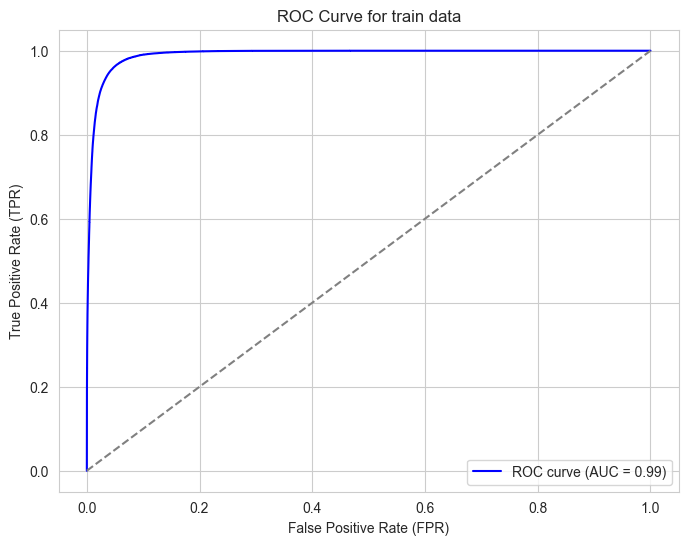

In [34]:
fpr, tpr, thresholds = roc_curve(y_train, y_proba)

roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='b', label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.title('ROC Curve for train data')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

In [44]:
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

In [45]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.85      0.91     83704
           1       0.87      0.98      0.92     83759

    accuracy                           0.91    167463
   macro avg       0.92      0.91      0.91    167463
weighted avg       0.92      0.91      0.91    167463



In [46]:
test_confusion_matrix = confusion_matrix(y_test, y_pred)

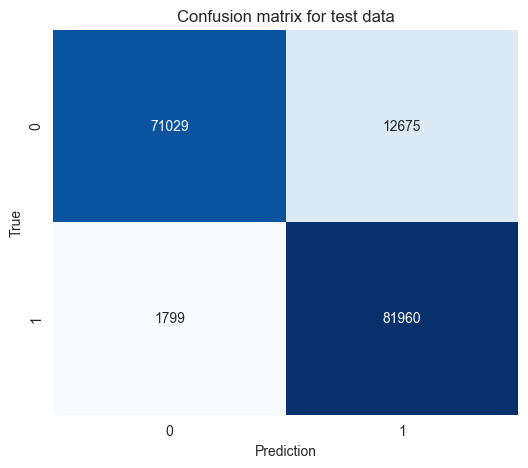

In [49]:
plt.figure(figsize=(6, 5))
sns.heatmap(test_confusion_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Prediction')
plt.ylabel('True')
plt.title('Confusion matrix for test data')
plt.show()

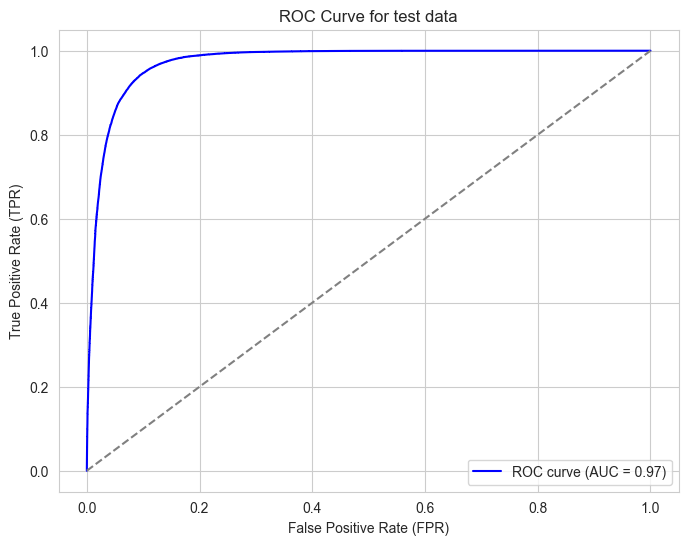

In [50]:
fpr, tpr, thresholds = roc_curve(y_test, y_proba)

roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='b', label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.title('ROC Curve for test data')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Top 20 features

In [36]:
importances = model.feature_importances_

In [37]:
features = pd.DataFrame({"Feature": feature_cols, "Importance": importances})

In [38]:
sorted_features = features.sort_values(by="Importance", ascending=False).head(20)

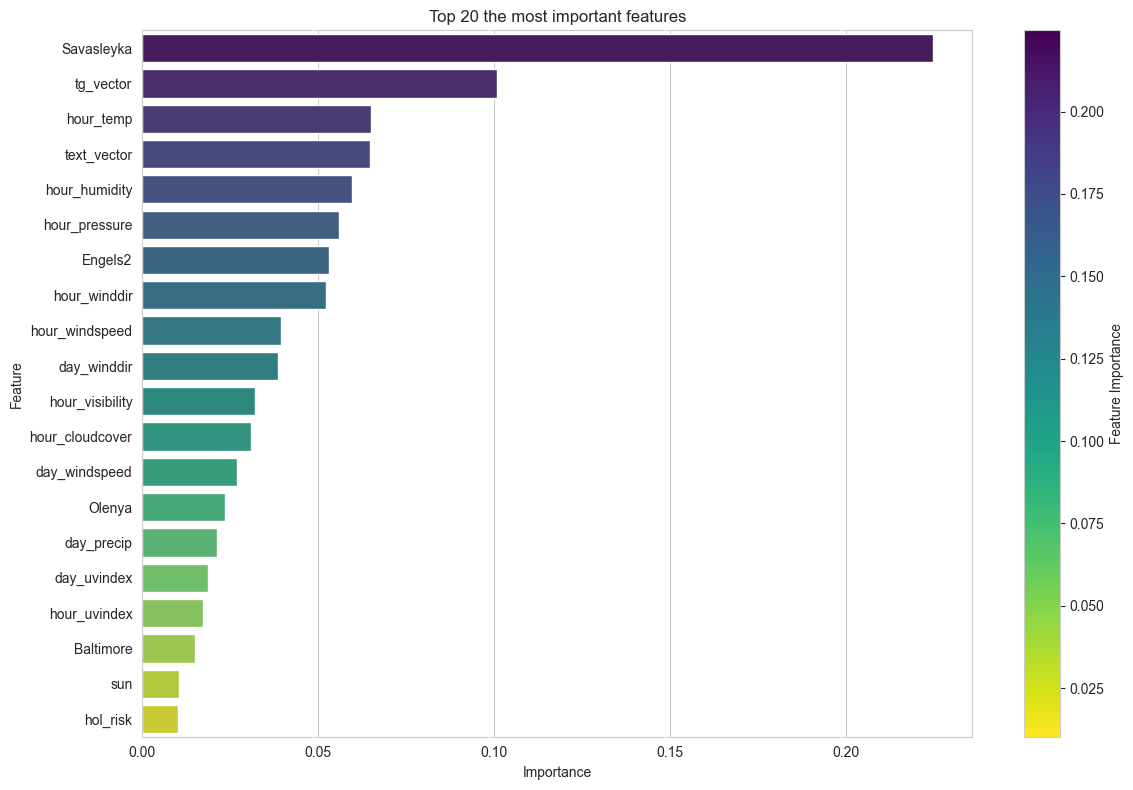

In [39]:
plt.figure(figsize=(12, 8))

norm = plt.Normalize(sorted_features['Importance'].min(), sorted_features['Importance'].max())
sm = plt.cm.ScalarMappable(cmap="viridis_r", norm=norm)
sm.set_array([])

ax = sns.barplot(
    x="Importance",
    y="Feature",
    data=sorted_features,
    hue="Feature",
    palette=sns.color_palette("viridis", n_colors=len(sorted_features)),
    dodge=False,
    legend=False
)

cbar = plt.colorbar(sm, ax=ax)
cbar.set_label('Feature Importance')

plt.title("Top 20 the most important features")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

In [40]:
dump(model, 'random_forest_classifier.pkl')
print("Model saved to random_forest_classifier.pkl")

Model saved to random_forest_classifier.pkl
